# Chapter 0 - Why do we need robust data?

<div>
<img src="../imgs/xkcd.png" width="500"/>
<figcaption><em>Garbage in, garbage out...</em></figcaption>
<div>

#### ***Chapter Imports***

Before running any code blocks in the following chapter, please ensure you have the necessary Python packages installed via the following code block:

In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


## What's the deal with data?

Before we start exploring how to wrangle real-life, messy data, it's key to understand why we would want to do so. Motivating the need for robust data can help us make decisions on how to generate, process, and interpret data. 

Nowadays, we often hear stories of analysis gone awry. Misapplication of cutting-edge technologies is all too common (e.g., machine learning's [reproducibility crisis](https://www.wired.com/story/machine-learning-reproducibility-crisis/)), but proper analytic techniques implemented in the context of flawed data can also lead to faulty conclusions throughout a research pipeline. 

Data can be flawed in many ways. A particularly salient example of data flaws are *biased datasets*. Some of the most common biases you'll find in data include: 

- Selection bias 
  - Ex: a test population not being representative of the whole by excluding a key minority group.
- Historical bias 
  - Ex: NLP word embedding models replicating gender-biased analogies like 'man::doctor, woman::nurse' due to historical disparities in opportunity.
- Survivorship bias 
  - Ex: evaluating performance of hedge funds from 1990 to 2010 - only those hedge which still exist in 2010 will be present, which already implies a certain degree of monetary sucess.
- Availability bias 
  - Ex: anytime we use a convenient data source instead of the best one.
- Outlier bias 
  - Ex: employing summary statistics which mask or are overly-sensitive to outliers to make conclusions and drive decisions.

For more on data bias: 
1. [Types of Biases in Data](https://towardsdatascience.com/types-of-biases-in-data-cafc4f2634fb)
2. [Statistical Bias Types explained](https://data36.com/statistical-bias-types-explained/)
3. [Fairness in Machine Learning](https://developers.google.com/machine-learning/crash-course/fairness/types-of-bias)

Data bias is just one of many ways a dataset can lack robustness. But, before we learn how to create robust datasets, we need to define what robust data is.

## Defining robust data

While the need for quality data may be apparent, what attributes such data would possess is not immediately obvious. 

What would an "ideal" dataset look like to you? How would you collect it? 

[comment]: <> (Break for Zoom discussion)

<div>
<img src="../imgs/datacollection.png" width="750"/>
<div>

When we look to describe the robustness of a dataset, it can be useful to think about what that data will be used for. Data may be used to: 

- Run experiments
- Validate hypotheses
- Draw inferences
- Make decisions

etc. These usages are all common and critical applications of data, and they all share a foundational element: they employ or rely on *data analysis.* 

Then, when we think about data robustness, it can be useful to think about it as being "robust to analysis" or not. When we define data robustness this way, are there additional ideal dataset qualities you can think of?

[comment]: <> (Break for Zoom discussion)

## A working definition

Ultimately, the exact definition of robust data are going to be dependent on your field of research and/or your particular application. However, some key considerations in any defintion include: 

- Data sourcing (which can lead to biased data, as previously dicussed)
- Data continuity 
- Data timeliness 

In this workshop, we're going to be exploring how each one of these considerations can impact the creation and analysis of US GDP (**G**ross **D**omestic **P**roduct) data. For some quick interactive definitions of these terms, take a look at the code blocks below. Otherwise, feel free to move onto the next chapter to learn some more about GDP and typical GDP data before jumping in. 

[comment]: <> (Allow time for code block running before moving onto the next chapter)

#### ***Data sourcing example:*** 


*Data sourcing* refers to the process of finding, assessing, and ultimately selecting a data resource to work with (be it a specific dataset, a wider database, or a third-party data vendor). Decisions by the curator of a data resource can impact the availability, representativeness, structure, and other critical attributes of your employed data — which ultimately can influence analysis . Let's see an example: 

In [2]:
""" DATA SOURCING INTERACTIVE DEFINITION """
# importing some libraries: 
import os                           # use: file management and access 
import pandas as pd                 # use: data intake and manipulation 
import matplotlib.pyplot as plt     # use: custom data visualization 

# retrieving the data - this is a dataset detailing data science job salaries: 
# source: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download
home_dir  = os.path.dirname(os.getcwd())
data_path = os.sep + 'sample_datasets' + os.sep + 'ds_salaries.csv'
data = pd.read_csv(home_dir + data_path, encoding='utf-8')

In [3]:
# let's get a quick look at a few entries: 
print(data.head(5))

# what different fields does this dataset possess for each entry? 
print(list(data.columns))

   work_year experience_level employment_type                   job_title  \
0       2020        Mid-level              FT              Data Scientist   
1       2020     Senior-level              FT  Machine Learning Scientist   
2       2020     Senior-level              FT           Big Data Engineer   
3       2020        Mid-level              FT        Product Data Analyst   
4       2020     Senior-level              FT   Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   70000             EUR          79833                 DE             0   
1  260000             USD         260000                 JP             0   
2   85000             GBP         109024                 GB            50   
3   20000             USD          20000                 HN             0   
4  150000             USD         150000                 US            50   

  company_location company_size  
0               DE            L  
1     

[Text(0, 0, '280'), Text(0, 0, '213'), Text(0, 0, '26'), Text(0, 0, '88')]

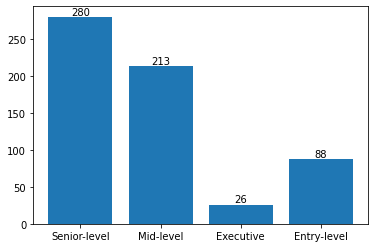

In [4]:
# let's see how many entries we have in the dataset for each experience level: 
expr_lvl_data = data['experience_level'].value_counts().sort_index(ascending=False)
bars = plt.bar(expr_lvl_data.index, expr_lvl_data.values)
plt.bar_label(bars)

**Discussion**: Based on the generated chart, if we were to compute the mean/median salary for a data science job in 2020, what kind of issues might we be overlooking? Is there anything fundamentally wrong with a mean/median calculation, or is there an issue with the dataset we chose to use? How might a different data source rectify these issues? 

#### ***Data continuity example:***

*Data continuity* refers the completeness of the chosen data source across a given dimension of analysis. A common dimension for evaluating data continuity is time as with time series data — if we would like to conduct biweekly analysis for a given metric for a specific year, a dataset with 26 appropriately-spaced and populated entries would be continuous with respect to time. 

Although time is an intuitive dimension, it is not the only one. Datasets can be continuous with respect to color, location, price, etc. — the evaluation depends on your desired criteria of analysis. Incomplete data can limit the scope and representativeness of your analysis, and methods to rectify incomplete data (e.g., impute missing values) can also impact your analysis. Let's see an example: 

In [5]:
""" DATA CONTINUITY INTERACTIVE DEFINITION """
# importing some libraries: 
import os                           # use: file management and access 
import pandas as pd                 # use: data intake and manipulation 
import matplotlib.pyplot as plt     # use: custom data visualization 

# retrieving the data - this is a dataset detailing time series climate data in Delhi:  
# source: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
home_dir  = os.path.dirname(os.getcwd())
data_path = os.sep + 'sample_datasets' + os.sep + 'daily_delhi_climate.csv'
data = pd.read_csv(home_dir + data_path, encoding='utf-8')

In [6]:
# let's check out the data structure:
print(data.head(5)) 

# .info() provides a concise summary of a dataframe: 
print(data.info())

# .describe() provides insight into the dispersion & shape of a dataframe's distribution: 
print(data.describe())

       date   meantemp   humidity  wind_speed  meanpressure
0  1/1/2013  10.000000  84.500000    0.000000   1015.666667
1  1/2/2013   7.400000  92.000000    2.980000   1017.800000
2  1/3/2013   7.166667  87.000000    4.633333   1018.666667
3  1/4/2013   8.666667  71.333333    1.233333   1017.166667
4  1/5/2013   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1401 non-null   object 
 1   meantemp      1395 non-null   float64
 2   humidity      1401 non-null   float64
 3   wind_speed    1401 non-null   float64
 4   meanpressure  1401 non-null   float64
dtypes: float64(4), object(1)
memory usage: 54.9+ KB
None
          meantemp     humidity   wind_speed  meanpressure
count  1395.000000  1401.000000  1401.000000   1401.000000
mean     25.445653    60.764961     6.742006   1011.24384

In [7]:
# let's take a look at the mean temperature in april: 

# subset just the date and temperature columns: 
data = data[['date', 'meantemp']]

# filter rows for just the dates occurring in april: 
april_start_end_idxs = data.index[(data['date'] == "4/1/2013") | (data['date'] == "4/30/2013")].tolist()
april_only_data = data[(april_start_end_idxs[0]) : (april_start_end_idxs[1] + 1)]

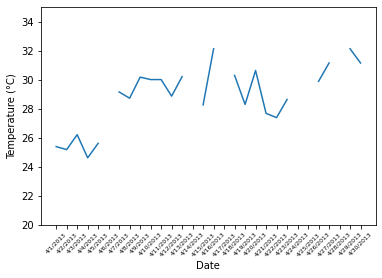

In [8]:
# are any dates missing? let's make a scatterplot to see: 
plt.plot(april_only_data['date'], april_only_data['meantemp'])

# some formatting options to make the plot readable: 
plt.xticks(rotation = 45, fontsize = 6)
plt.ylim((20,35))
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")

# display the plot: 
plt.show()

**Discussion**: Based on the scatter plot, is the April temperature data continuous? If we were trying to conduct some analysis on the April temperature data, how might the (lack of) data continuity affect us? Could we impute the points of discontinuity? How? Would one imputation method be better than others? Why? 

#### ***Data timeliness example:***

*Data timeliness* refers to the proximity of utilized data to the present moment and relevant analysis and projections. Establishing data timeliness means utlizing datasets that are near-contemporaneous with your timeframe of analysis; i.e., NLP analysis on the most prominent topics in 1970's science textbooks should not use a text corpus of 1950's science textbooks. 

In the case of research motivating predictions and decision-making, data timeliness is especially relevant — e.g., predicting potential wildfire hotspots demands continuously-updated and near real-time data. To that end, data sourcing and data continuity assessments of available resources become particularly important. 

Although data timeliness may appear to be a structural product of data sourcing and continuity, we'll later discuss methods to guarantee data timeliness (like developing a coincident/leading indicators) to ensure your data and analytic products are up-to-date. 

In [9]:
""" DATA CONTINUITY INTERACTIVE DEFINITION """
# importing some libraries: 
import os                           # use: file management and access 
import pandas as pd                 # use: data intake and manipulation 
import matplotlib.pyplot as plt     # use: custom data visualization 

# retrieving the data - this is a dataset detailing hospital capacity in SF for COVID-19:  
# source: https://catalog.data.gov/dataset/covid-19-hospital-capacity
home_dir  = os.path.dirname(os.getcwd())
data_path = os.sep + 'sample_datasets' + os.sep + 'covid19_hospital_capacity.csv'
data = pd.read_csv(home_dir + data_path, encoding='utf-8')

In [10]:
# always explore the data before processing it!
# sample entries: 
print(data.head(5)) 

# info on the dataset columns and types: 
print(data.info())

                 Hospital      Date              Bed Type  \
0  All SF Acute Hospitals  4/1/2020  Intensive Care Surge   
1  All SF Acute Hospitals  4/1/2020      Acute Care Surge   
2  All SF Acute Hospitals  4/1/2020            Acute Care   
3  All SF Acute Hospitals  4/1/2020        Intensive Care   
4  All SF Acute Hospitals  4/1/2020        Intensive Care   

                             Status  Count  
0                         Available    312  
1                         Available    846  
2                         Available    846  
3                         Available    125  
4  COVID-19 (Confirmed & Suspected)     50  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Hospital  4514 non-null   object
 1   Date      4514 non-null   object
 2   Bed Type  4514 non-null   object
 3   Status    4514 non-null   object
 4   Count     4514 non-null 

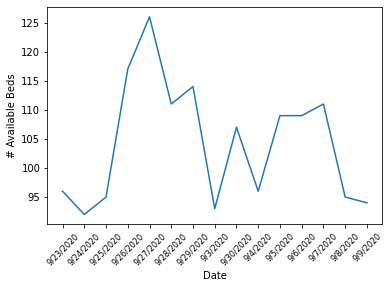

In [11]:
# suppose we're only concerned with 'Available,' 'Intensive Care' beds: 
avail_ic_beds = data[(data['Bed Type'] == 'Intensive Care') & (data['Status'] == 'Available')]

# sort the dataset by date: 
avail_ic_beds = avail_ic_beds.sort_values(by='Date', ignore_index=True)

# let's get just the latest data: 
avail_ic_beds = avail_ic_beds.tail(15)

# visualize the data: 
plt.plot(avail_ic_beds['Date'], avail_ic_beds['Count'])
plt.xticks(rotation = 45, fontsize = 8)
plt.xlabel("Date")
plt.ylabel("# Available Beds")
plt.show()

**Discussion**: Where does this dataset end? Would this data be useful for predicting the number of available beds *today*? If no, what might be an alternative solution for this prediction task? If we can't find a better dataset for this exact metric, can we approximate it somehow? 

## Workshop essentials: GDP definitions & datasets

<div>
<img src="../imgs/gdp_calculation.gif" width="350"/>
<figcaption><em>One of economics' greatest hits!</em><figcaption>
</div>

#### ***Defintion and usage:***

For the rest of this workshop, we'll be exploring topics in the context of US GDP (**G**ross **D**omestic **P**roduct) data. In case you haven't worked with GDP data before, or you just want a quick refresher, here's a rundown:  

* *Definition:* GDP is "the total monetary or market value of all the finished goods and services produced within a country's borders in a specific time period. 

* *Use:* general indicator of a country's overall productivity and/or economic health (useful for large-scale social inquiries)

* *Common forms:* 
  * nominal GDP - GDP as measured with contemporaneous prices of goods
  * real GDP - GDP as measured with a fixed year's prices of goods
  * potential GDP - an estimate of a country's GDP under ideal economic conditions (e.g., steady currency value, low inflation, full employment)
  * GDP per capita - GDP divided by the population of a country, productivity per person

#### ***Your "typical" GDP dataset:*** 

What makes GDP an ideal statistic to wrangle with when learning to deal with "real-life" data? Let's take a look: 

* *Qualities of GDP Data(sets):*

  * Typically presented as **timeseries** data, a common data type for longitudinal studies. 

  * Usually published with a **lag** - e.g., 2013 Q2 GDP data wasn't officially released until the end of 2013 Q3.

  * Computed and posted by **numerous** agencies and entities, typically government-related.

  * **Multiple** approaches available for calculation (e.g., expenditure, production, and income approaches)

As we'll soon find out, each of these qualities can lend itself to inherent issues in the sourcing and use of GDP data! When you're ready, move on to Chapter 1 ⏩!